In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
import numpy as np
import pandas as pd

In [3]:
FAstat = '/Users/alicja/Documents/Neurohackademy22/fsub/subj01/FA_stats.txt' #hardcoded, needs to change

In [4]:
with open(FAstat) as f:
    FAs = [float(val) for val in f.read().splitlines()[1].split(' ')]

In [5]:
FA_means = pd.DataFrame(FAs, columns = ['meanFA'])

In [6]:
print('Mean:\t', np.mean(FA_means['meanFA']), '\nSD:\t\t', np.std(FA_means['meanFA']))

Mean:	 0.41912892461095885 
SD:		 0.039365483440029936


In [7]:
with open(r'FA_out.tsv', 'w') as fp:
    for val in FAs:
        fp.write("%s\n" % val)
    fp.write('\nMean FA: ' + str(np.mean(FA_means['meanFA'])))
    fp.write('\nSD: ' + str(np.std(FA_means['meanFA'])))

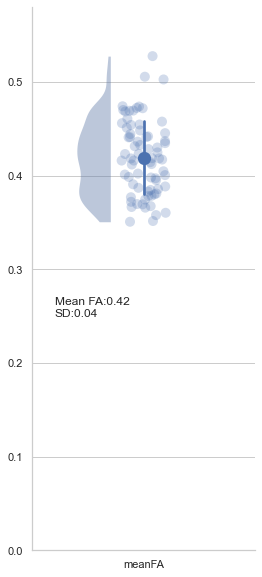

In [9]:
sns.set_theme(style="whitegrid")

ax, fig = plt.subplots(figsize=(4, 10))
#sns.violinplot(data = FA_means, saturation = 0.2, linewidth =0, width = 0.3)
ax = sns.stripplot(data = FA_means, size = 10, alpha = 0.25)
ax = sns.pointplot(data = FA_means, ci = 'sd', scale = 1.5)
ax = pt.half_violinplot(data = FA_means, bw = .3, cut = 0., alpha = 0.4,
                        scale = "area", width = .3, inner = None, linewidth=0)
plt.ylim(0, 1.1*max(FA_means['meanFA']))
text = 'Mean FA:'+ str(round(np.mean(FA_means['meanFA']), 2)) + '\nSD:' + str(round(np.std(FA_means['meanFA']), 2))
plt.text(-0.4, 0.25, text)
sns.despine()

plt.savefig('FAs_visuals.png')